# **In-Vehicle Coupon Recommendation**

---

    Nama       : Syahril Dimas Sabirin
    Nomor Reg. : 1985590840-1000
    Pelatihan  : Python Batch 1 (PYT1)

# **A. Exploratory Data Analysis**

## Import Library

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)

NumPy 1.22.4
Pandas 1.5.3
Matplotlib 3.7.1
Seaborn 0.12.2


## Read Dataset

Dataset ini diperoleh melalui survei di Amazon Mechanical Turk yang diterbitkan di website [University of California, Irvine](https://archive.ics.uci.edu/ml/datasets/in-vehicle+coupon+recommendation) pada tahun 2017. Survei ini menjelaskan beberapa skenario berkendara, seperti tujuan, penumpang, kondisi cuaca, dan waktu, lalu menanyakan kepada responden apakah dia akan menerima kupon atau tidak, jika dia adalah pengendara.

In [4]:
# Read dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00603/in-vehicle-coupon-recommendation.csv'
df = pd.read_csv(url)

## **1. Data Exploration**

### 1.1. Dimensions of the DataFrame

In [5]:
df.shape

(12684, 26)

In [6]:
print('Jumlah baris: {}'.format(df.shape[0]))
print('Jumlah kolom: {}'.format(df.shape[1]))

Jumlah baris: 12684
Jumlah kolom: 26


- Dataset ini memiliki dimensi data, yaitu 12.684 baris dan 26 kolom (fitur), dan salah satu dari kolom tersebut adalah fitur target.

### 1.2. Data Types of the Columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

- Dataset ini memiliki 8 fitur numerikal (_integer_) dan 18 fitur kategorikal (_object_).

### 1.3. Display a Few Rows

Saya menampilkan 5 sampel acak dengan menggunakan metode `sample()`.

In [8]:
# Check the sample
df.sample(n = 5, random_state = 100)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
762,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Female,50plus,Married partner,0,Some college - no degree,Healthcare Support,$25000 - $37499,NaN,1~3,1~3,4~8,4~8,1~3,1,0,0,1,0,1
11873,No Urgent Place,Friend(s),Snowy,30,2PM,Restaurant(<20),1d,Female,21,Married partner,1,Some college - no degree,Sales & Related,$25000 - $37499,NaN,less1,1~3,4~8,1~3,never,1,0,0,0,1,1
9631,Home,Alone,Sunny,80,6PM,Carry out & Take away,1d,Male,46,Single,0,Some college - no degree,Production Occupations,Less than $12500,NaN,4~8,4~8,1~3,less1,1~3,1,0,0,0,1,1
10312,Work,Alone,Rainy,55,7AM,Carry out & Take away,2h,Female,31,Married partner,1,Bachelors degree,Unemployed,$100000 or More,NaN,never,4~8,4~8,4~8,less1,1,1,0,1,0,0
2334,Work,Alone,Sunny,55,7AM,Restaurant(<20),1d,Female,31,Single,0,Bachelors degree,Sales & Related,$25000 - $37499,NaN,4~8,1~3,1~3,4~8,1~3,1,0,0,0,1,1


### 1.4. Number of Unique Classes

In [9]:
df.nunique()

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
car                      5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Y                        2
dtype: int64

In [10]:
values = {'Feature Name'   : [],
          'Unique Classes' : []}

for col in df.columns:
    values['Feature Name'].append(col)
    values['Unique Classes'].append(df[col].unique())

values = pd.DataFrame(values)
values

,Feature Name,Unique Classes
0,destination,"[No Urgent Place, Home, Work]"
1,passanger,"[Alone, Friend(s), Kid(s), Partner]"
2,weather,"[Sunny, Rainy, Snowy]"
3,temperature,"[55, 80, 30]"
4,time,"[2PM, 10AM, 6PM, 7AM, 10PM]"
5,coupon,"[Restaurant(<20), Coffee House, Carry out & Ta..."
6,expiration,"[1d, 2h]"
7,gender,"[Female, Male]"
8,age,"[21, 46, 26, 31, 41, 50plus, 36, below21]"
9,maritalStatus,"[Unmarried partner, Single, Married partner, D..."


Dari _quick analysis_, saya menemukan ketidaksesuaian, yaitu:
- Fitur `temperature` seharusnya kategorikal, karena memiliki tipe data ordinal.
- Fitur `has_children` seharusnya kategorikal, karena memiliki tipe data nominal.
- Fitur `age` dan `occupation` memiliki banyak nilai unik (kategori), sehingga perlu dilakukan pengelompokan agar lebih ringkas.
- Fitur `car` memiliki nilai unik yang tidak sesuai, seperti "Scooter and motorcycle".
- Fitur `toCoupon_GEQ5min` hanya memiliki 1 nilai unik, sehingga akan dihapus, karena tidak memberikan _insight_ yang cukup banyak.
- Fitur `Y` merupakan fitur target, sehingga perlu diubah nama fiturnya menjadi `is_accepted` agar tidak menimbulkan ketidakjelasan atau ambiguitas.
- Fitur-fitur seperti `passanger` dan `maritalStatus` perlu dilakukan penamaan ulang.

### 1.5. Detect Missing Data

In [11]:
# Detect missing value
df.isna().any()

destination             False
passanger               False
weather                 False
temperature             False
time                    False
coupon                  False
expiration              False
gender                  False
age                     False
maritalStatus           False
has_children            False
education               False
occupation              False
income                  False
car                      True
Bar                      True
CoffeeHouse              True
CarryAway                True
RestaurantLessThan20     True
Restaurant20To50         True
toCoupon_GEQ5min        False
toCoupon_GEQ15min       False
toCoupon_GEQ25min       False
direction_same          False
direction_opp           False
Y                       False
dtype: bool

In [12]:
# Summarize missing value
df.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [13]:
total = df.isna().sum().sort_values(ascending = False)
percent = round((df.isna().sum() / df.isna().count() * 100), 2).sort_values(ascending = False)

na = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percentage (%)'])
na = na[na['Percentage (%)'] > 0]
na.reset_index().rename(columns = {'index': 'Feature Name'})

,Feature Name,Total,Percentage (%)
0,car,12576,99.15
1,CoffeeHouse,217,1.71
2,Restaurant20To50,189,1.49
3,CarryAway,151,1.19
4,RestaurantLessThan20,130,1.02
5,Bar,107,0.84


In [14]:
df.isna().sum().sum()

13370

- Dataset ini memiliki _missing value_ sebanyak 13.370.
- Fitur `car` memiliki _missing value_ sebanyak 12.576 atau 99%, sehingga akan dihapus, karena _less importance_.
- Data yang kosong pada fitur `Bar`, `CarryAway`, `CoffeeHouse`, `RestaurantLessThan20`, dan `Restaurant20To50` akan dilakukan _imputation_ pada tahap _preprocessing_.

### 1.6. Detect Duplicated Data

In [15]:
duplicated_rows = df.duplicated()
duplicated_rows.value_counts()

False    12610
True        74
dtype: int64

- Dataset ini memiliki data duplikat sebanyak 74, sehingga akan dihapus.

In [16]:
# Drop duplicates
df = df.drop_duplicates()
df.shape

(12610, 26)

### 1.7. Descriptive Statistics

#### 1.7.0. Check Features

##### Check Features

In [17]:
# Before
before = df.dtypes

# Change multiple columns dtypes: integer to string
df = df.astype({'temperature'  : str,
                'has_children' : str})

# Categorize 'age'
def categorize_age(age):
  if age == 'below21':
    return '<21'
  elif age in ('21', '26'):
    return '21-30'
  elif age in ('31', '36'):
    return '31-40'
  elif age in ('41', '46'):
    return '41-50'
  else:
    return '>50'
df['age'] = df['age'].apply(categorize_age)

# Categorize 'occupation'
def categorize_occupation(occupation):
  if occupation in ['Computer & Mathematical', 'Education&Training&Library',
                    'Management', 'Arts Design Entertainment Sports & Media',
                    'Business & Financial', 'Healthcare Practitioners & Technical',
                    'Legal', 'Architecture & Engineering']:
    return 'Professional'
  elif occupation in ['Sales & Related', 'Office & Administrative Support',
                      'Food Preparation & Serving Related', 'Healthcare Support',
                      'Community & Social Services', 'Personal Care & Service',
                      'Protective Service']:
    return 'Sales and Services'
  elif occupation in ['Construction & Extraction', 'Installation Maintenance & Repair']:
    return 'Technician'
  elif occupation == 'Unemployed':
    return 'Unemployed'
  elif occupation == 'Student':
    return 'Student'
  elif occupation == 'Retired':
    return 'Retired'
  else:
    return 'Others'
df['occupation'] = df['occupation'].apply(categorize_occupation)

# Drop multiple columns
df = df.drop(['car', 'toCoupon_GEQ5min'], axis = 1)

# Rename features
df.rename(columns = {'passanger'            : 'passenger',
                     'maritalStatus'        : 'marital_status',
                     'Bar'                  : 'bar',
                     'CoffeeHouse'          : 'coffee_house',
                     'CarryAway'            : 'carry_out_take_away',   # Carry-out & Take-away
                     'RestaurantLessThan20' : 'resto_less20',
                     'Restaurant20To50'     : 'resto_20to50'}, inplace = True)

# Rename target feature to reduce ambiguity
df = df.rename(columns = {'Y' : 'is_accepted'})

# Change multiple columns dtypes: object to category
df_object = df.select_dtypes(include = ['object']).copy()
for col in df_object.columns:
  df[col]=df[col].astype('category')

# After
after = df.dtypes

print(f'Sebelum Pengubahan:\n{before}\n')
print(f'Sesudah Pengubahan:\n{after}\n')

Sebelum Pengubahan:
destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

Sesudah Pengubahan:
destination            category
passenger              category
weather                category
temperature            category
time       

##### Define Features

In [18]:
df.columns

Index(['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'marital_status', 'has_children',
       'education', 'occupation', 'income', 'bar', 'coffee_house',
       'carry_out_take_away', 'resto_less20', 'resto_20to50',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'is_accepted'],
      dtype='object')

In [19]:
# Define features
num = df.select_dtypes(exclude = ['category']).drop('is_accepted', axis = 1)
cat = df.select_dtypes(include = ['category'])
target = df['is_accepted']

In [20]:
num.shape[1]

4

In [21]:
cat.shape[1]

19

#### 1.7.1. Numerical Features

In [22]:
# Summary statistics for numerical features
num.describe().T

,count,mean,std,min,25%,50%,75%,max
toCoupon_GEQ15min,12610.0,0.559794,0.496432,0.0,0.0,1.0,1.0,1.0
toCoupon_GEQ25min,12610.0,0.116019,0.320260,0.0,0.0,0.0,0.0,1.0
direction_same,12610.0,0.215543,0.411215,0.0,0.0,0.0,0.0,1.0
direction_opp,12610.0,0.784457,0.411215,0.0,1.0,1.0,1.0,1.0


In [23]:
num.describe().loc[['mean', '50%']].T

,mean,50%
toCoupon_GEQ15min,0.559794,1.0
toCoupon_GEQ25min,0.116019,0.0
direction_same,0.215543,0.0
direction_opp,0.784457,1.0


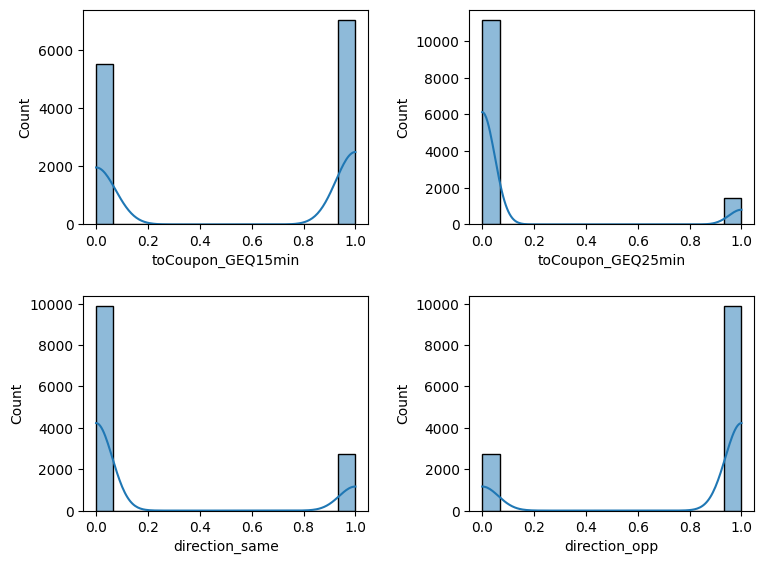

In [24]:
plt.figure(figsize = (8, 6))
for i in enumerate(num):
  plt.subplot(2, 2, i[0] + 1)
  sns.histplot(df[i[1]], kde = True)

plt.tight_layout(pad = 2)
plt.show()

#### 1.7.2. Categorical Features

In [25]:
# Summary statistics for categorical features
cat.describe().T

,count,unique,top,freq
destination,12610,3,No Urgent Place,6266
passenger,12610,4,Alone,7248
weather,12610,3,Sunny,10011
temperature,12610,3,80,6475
time,12610,5,6PM,3220
coupon,12610,5,Coffee House,3989
expiration,12610,2,1d,7031
gender,12610,2,Female,6469
age,12610,5,21-30,5190
marital_status,12610,5,Married partner,5068


In [26]:
# Count values
for col in cat:
    print(f'Percentage of each class - {col}:')
    print(df[col].value_counts(normalize = True))
    print()

Percentage of each class - destination:
No Urgent Place    0.496907
Home               0.256146
Work               0.246947
Name: destination, dtype: float64

Percentage of each class - passenger:
Alone        0.574782
Friend(s)    0.261063
Partner      0.084774
Kid(s)       0.079381
Name: passenger, dtype: float64

Percentage of each class - weather:
Sunny    0.793894
Snowy    0.110785
Rainy    0.095321
Name: weather, dtype: float64

Percentage of each class - temperature:
80    0.513481
55    0.303727
30    0.182791
Name: temperature, dtype: float64

Percentage of each class - time:
6PM     0.255353
7AM     0.246947
10AM    0.180095
2PM     0.159080
10PM    0.158525
Name: time, dtype: float64

Percentage of each class - coupon:
Coffee House             0.316336
Restaurant(<20)          0.220381
Carry out & Take away    0.185884
Bar                      0.159397
Restaurant(20-50)        0.118002
Name: coupon, dtype: float64

Percentage of each class - expiration:
1d    0.557573
2h    

In [27]:
# Mengambil nilai count dan freq
count = cat.describe().loc['count']
top_freq = cat.describe().loc['freq']

# Menghitung persentase top_freq terhadap count
percentage = (top_freq / count) * 100
percentage = percentage.astype(float)

# Menggabungkan hasil top_freq dengan percentage
result = pd.concat([cat.describe().loc['top'], percentage], axis = 1)
result.columns = ['Top most frequent class', 'Percentage (%)']
result.round(2).reset_index().rename(columns = {'index': 'Feature Name'})

,Feature Name,Top most frequent class,Percentage (%)
0,destination,No Urgent Place,49.69
1,passenger,Alone,57.48
2,weather,Sunny,79.39
3,temperature,80,51.35
4,time,6PM,25.54
5,coupon,Coffee House,31.63
6,expiration,1d,55.76
7,gender,Female,51.30
8,age,21-30,41.16
9,marital_status,Married partner,40.19


#### 1.7.3. Target Feature

In [28]:
persen_target = target.value_counts(normalize = True)
persen_target

1    0.567565
0    0.432435
Name: is_accepted, dtype: float64

In [29]:
percent_negative = persen_target[0] * 100 # Rejected coupon
percent_positive = persen_target[1] * 100 # Accepted coupon

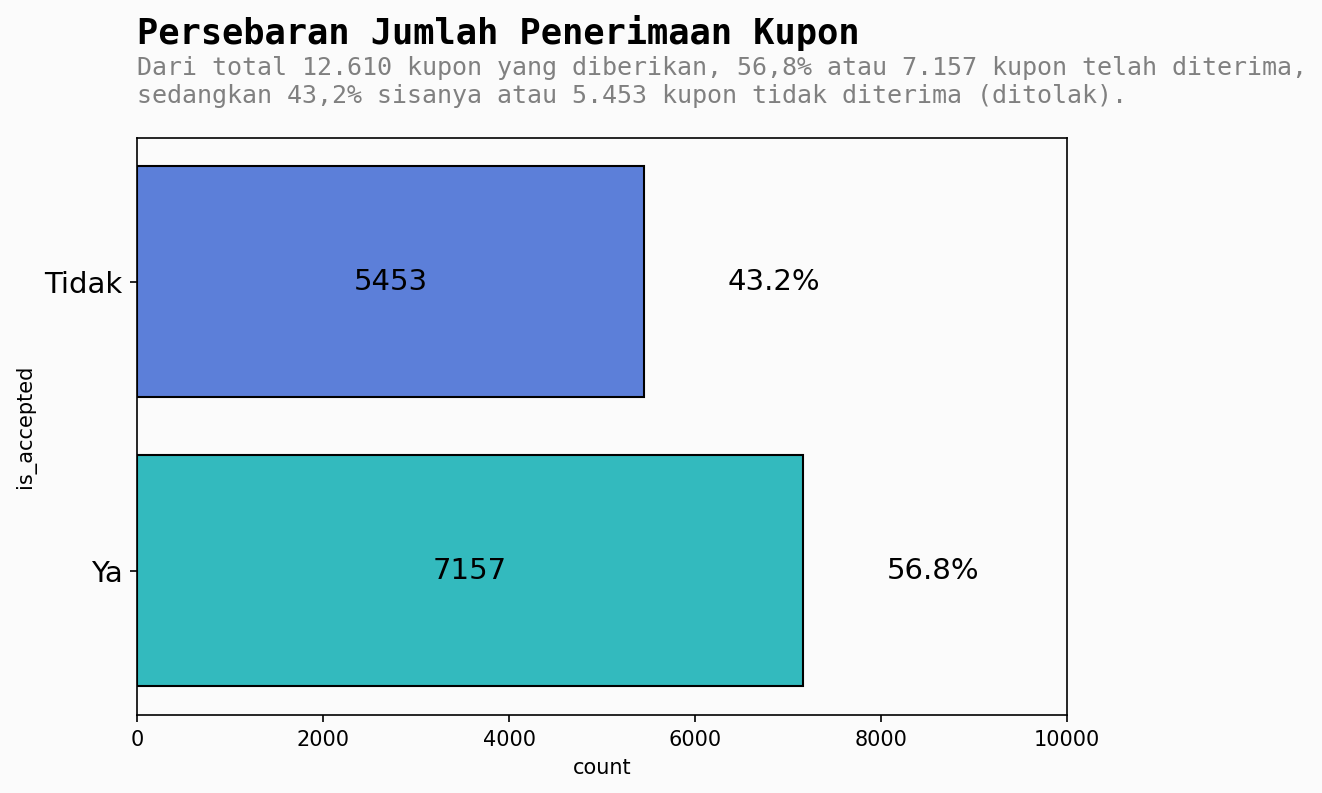

In [30]:
background = "#fbfbfb"
fig, ax = plt.subplots(figsize = (8, 5), dpi = 150)
fig.patch.set_facecolor(background)       # Figure background color
ax.set_facecolor(background)

sns.set(style = 'white', palette = 'turbo')
sns.countplot(y = target, data = df, ax = ax, edgecolor = 'black')

for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'),
                (p.get_width() / 2., p.get_y() + p.get_height() / 2.),
                va = 'center', ha = 'center',
                xytext = (0, 0),
                textcoords = 'offset points', fontsize = 14, color = 'black')
    
total = float(len(target))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_width() + 900
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), ha = 'left', va = 'center', fontsize = 14, color = 'black')

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.set_axisbelow(True)
ax.set_xlim(0, 10000)
ax.set_yticklabels(['Tidak', 'Ya'], fontsize = 14)
ax.text(0, Yend - 0.325, 'Persebaran Jumlah Penerimaan Kupon', fontsize = 17, fontweight = 'bold', fontfamily = 'monospace', color =  'black')
ax.text(0, Yend - 0.025,
'''
Dari total 12.610 kupon yang diberikan, 56,8% atau 7.157 kupon telah diterima,
sedangkan 43,2% sisanya atau 5.453 kupon tidak diterima (ditolak).
''', fontsize = 12, fontweight = 'light', fontfamily = 'monospace', color = 'gray')
plt.show()

- Dari total 12.610 kupon yang diberikan, 56,8% atau 7.157 kupon telah diterima, sedangkan 43,2% sisanya atau 5.453 kupon tidak diterima (ditolak).
- Target relatif _balance_ atau seimbang, karena proporsi data minoritas > 40%, sehingga tidak termasuk [_imbalanced target_](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data/).

## **2. Data Visualization**

In [31]:
df_num = num.columns
df_cat = cat.columns

### 2.1. Univariate Analysis

In [32]:
from matplotlib import rcParams

Numerical Features

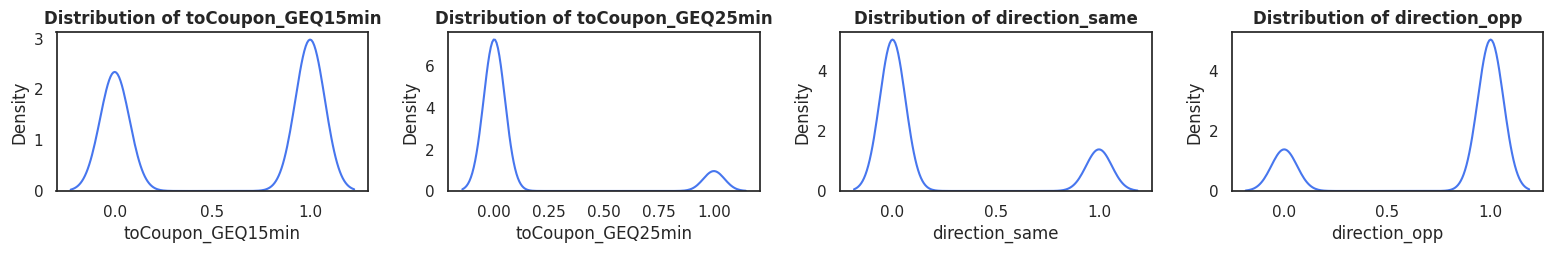

In [33]:
rcParams['figure.figsize'] = 16, 3

# Pengecekan distribusi dari fitur numerical menggunakan kdeplot
for i in range(0, len(df_num)):
    plt.subplot(1, 4, i + 1)
    sns.kdeplot(x = df[df_num[i]])
    plt.xlabel(df_num[i])
    plt.title('Distribution of ' + df_num[i],
              fontsize = 12,
              fontweight = 'bold')
    plt.tight_layout(pad = 2)

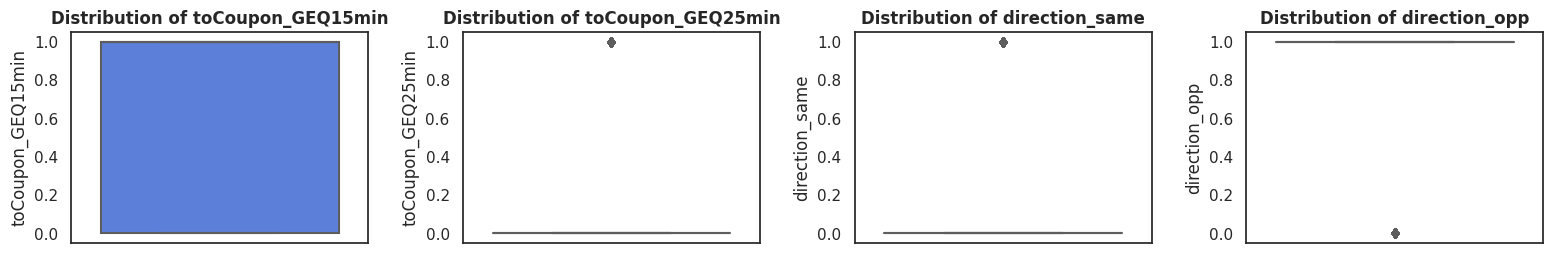

In [34]:
# Pengecekan distribusi dari fitur numerical menggunakan boxplot
for i in range(0, len(df_num)):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(y = df[df_num[i]])
    plt.title('Distribution of ' + df_num[i],
              fontsize = 12,
              fontweight = 'bold')
    plt.tight_layout(pad = 2)

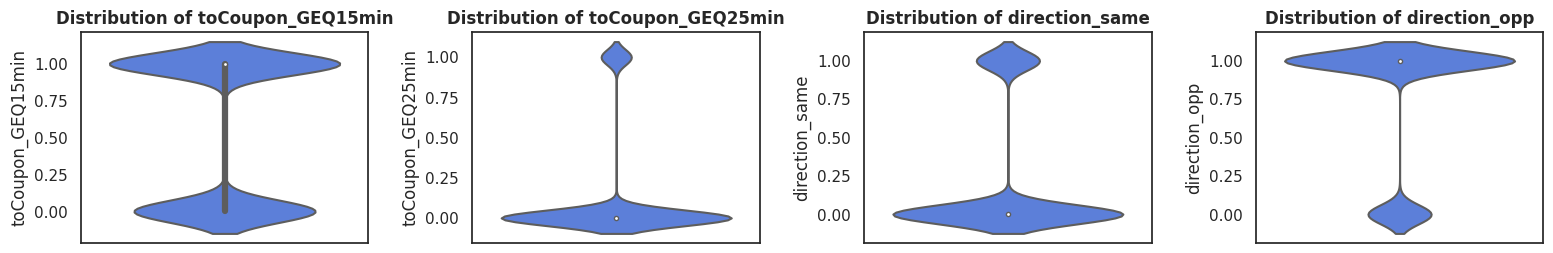

In [35]:
# Pengecekan distribusi dari fitur numerical menggunakan violinplot
for i in range(0, len(df_num)):
    plt.subplot(1, 4, i + 1)
    sns.violinplot(y = df[df_num[i]])
    plt.title('Distribution of ' + df_num[i],
              fontsize = 12,
              fontweight = 'bold')
    plt.tight_layout(pad = 2)

Categorical Features

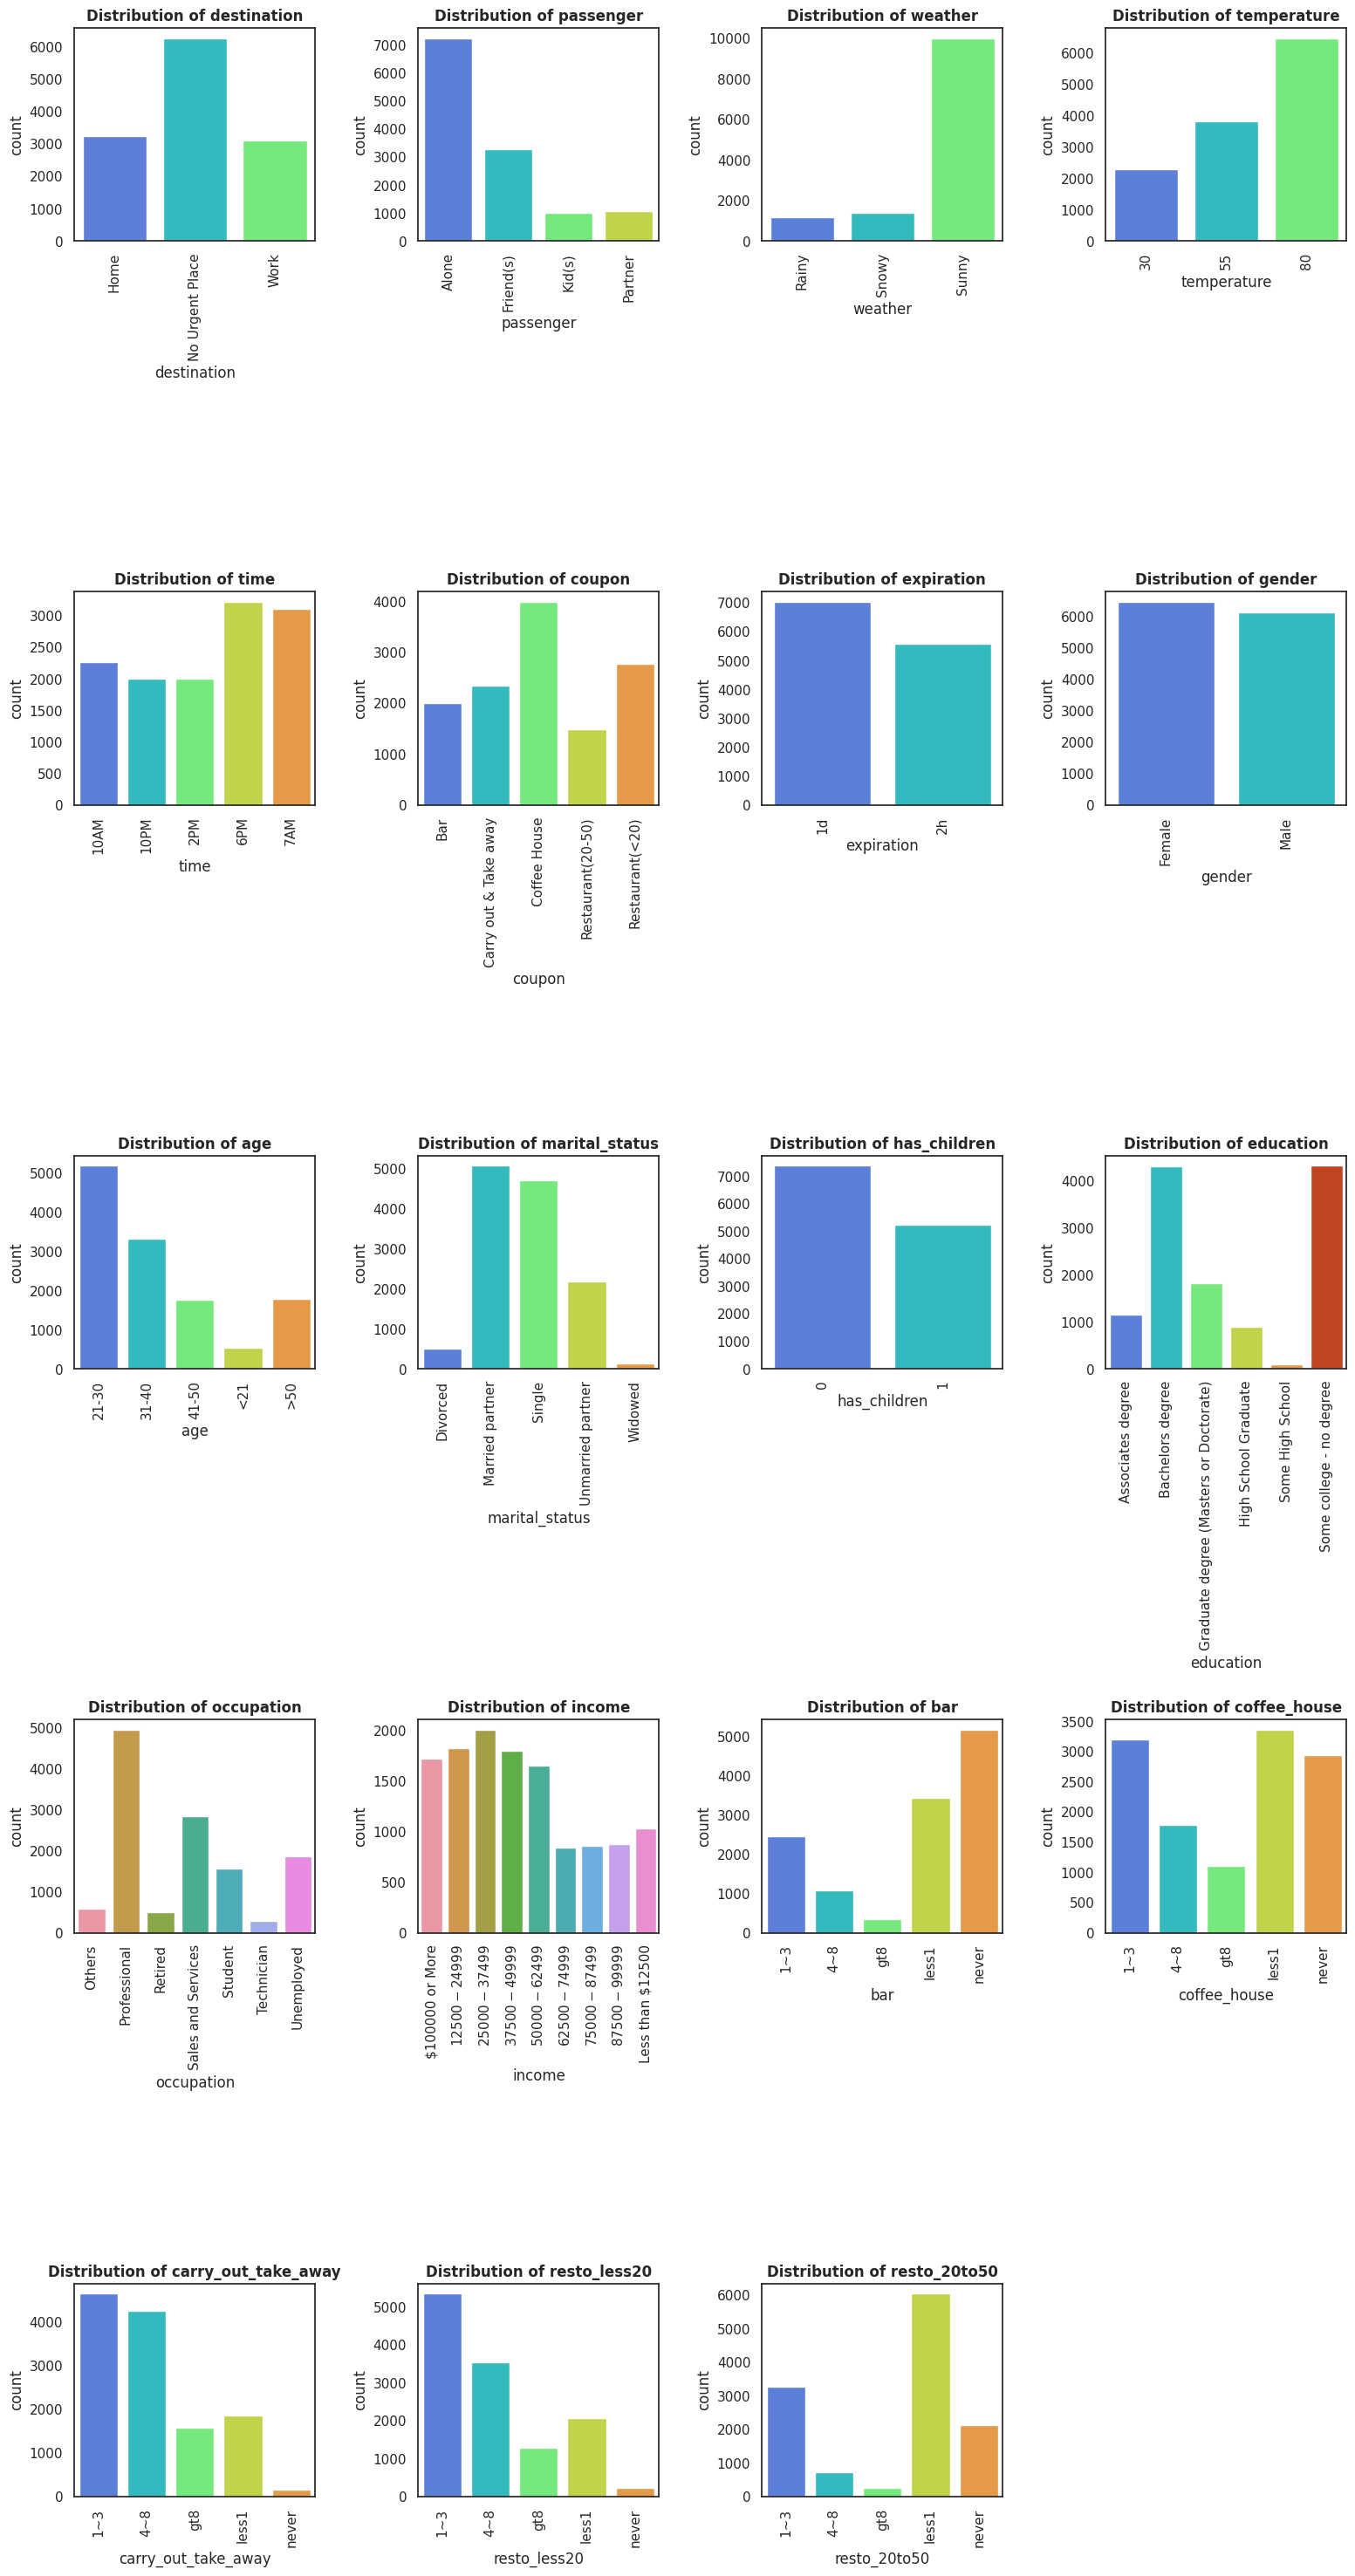

In [36]:
rcParams['figure.figsize'] = 16, 30

sns.set(style = 'white', palette = 'turbo')
# Pengecekan distribusi dari fitur kategorical menggunakan countplot
for i in range(0, len(df_cat)):
    plt.subplot(5, 4, i + 1)
    sns.countplot(x = df[df_cat[i]])
    plt.xticks(rotation = 90)
    plt.title(f'Distribution of {df_cat[i]}',
              fontsize = 12,
              fontweight = 'bold')
    plt.tight_layout(pad = 2)

### 2.2. Bivariate Analysis

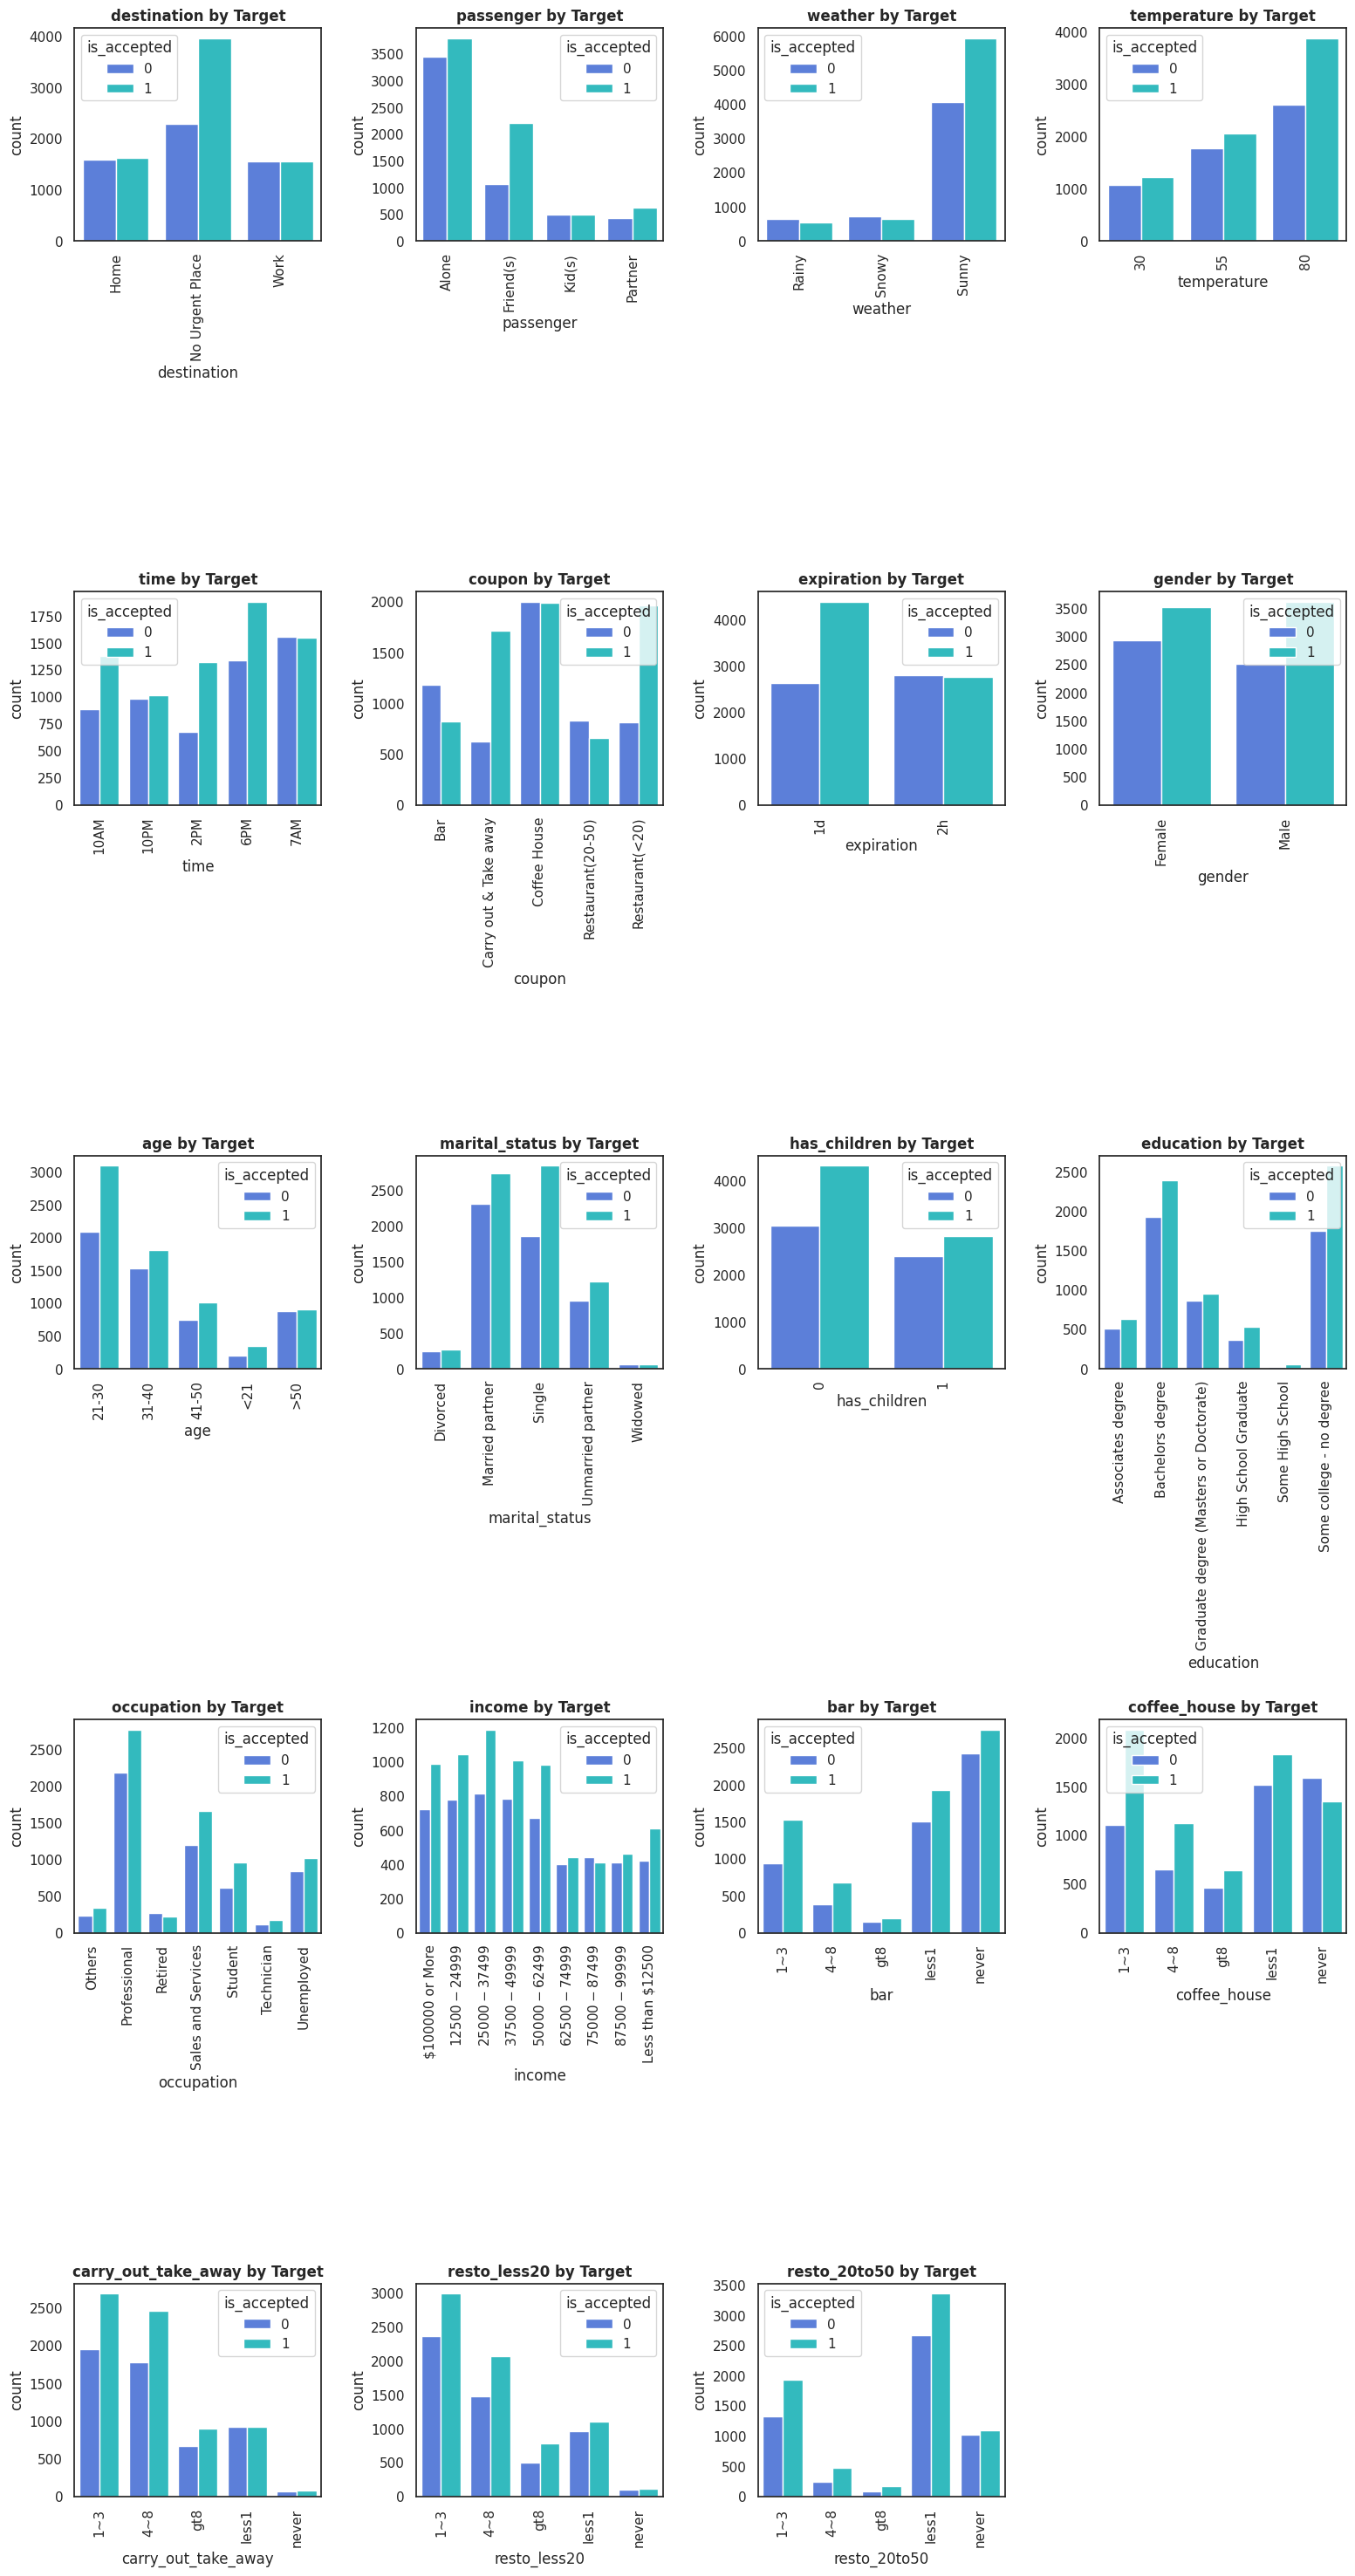

In [37]:
rcParams['figure.figsize'] = 16, 30

sns.set(style = 'white', palette = 'turbo')
# Pengecekan distribusi dari fitur kategorical terhadap target
for i in range(0, len(df_cat)):
    plt.subplot(5, 4, i + 1)
    sns.countplot(x = df[df_cat[i]],
                  hue = target)
    plt.xticks(rotation = 90)
    plt.title(f'{df_cat[i]} by Target',
              fontsize = 12,
              fontweight = 'bold')
    plt.tight_layout(pad = 2)

- Pada fitur `destination`, pengendara dengan tujuan `No Urgent Place` memiliki jumlah penerima kupon terbanyak.
- Pada fitur `passenger`, pengendara tanpa penumpang atau `Alone` memiliki jumlah penerima kupon terbanyak, tetapi jumlah penolakannya juga banyak.
- Pada fitur `weather` diketahui bahwa pengendara menerima kupon terbanyak ketika kondisi cuaca cerah atau `Sunny` dibandingkan yang lainnya.
- Pada `temperature` 80°F atau 27°C memiliki tingkat penerimaan kupon tertinggi.
- Waktu atau `time` yang memiliki tingkat penerimaan kupon tertinggi adalah `10AM`, `2PM`, dan `6PM`.
- Jenis `coupon` yang paling banyak diterima adalah `Carry out & Take away`.
- Kupon dengan `expiration` dalam 1 hari (`1d`) lebih banyak diterima daripada dalam 2 jam (`2h`).
- Diketahui `gender` dengan rasio penerimaan kupon tertinggi adalah `Male`.
- Diketahui `age` antara 21-30 tahun merupakan penerima kupon paling banyak.
- Pengendara dengan `marital_status` masih `Single` dan `Marriage partner` menerima kupon paling banyak.


### 2.3. Multivariate Analysis

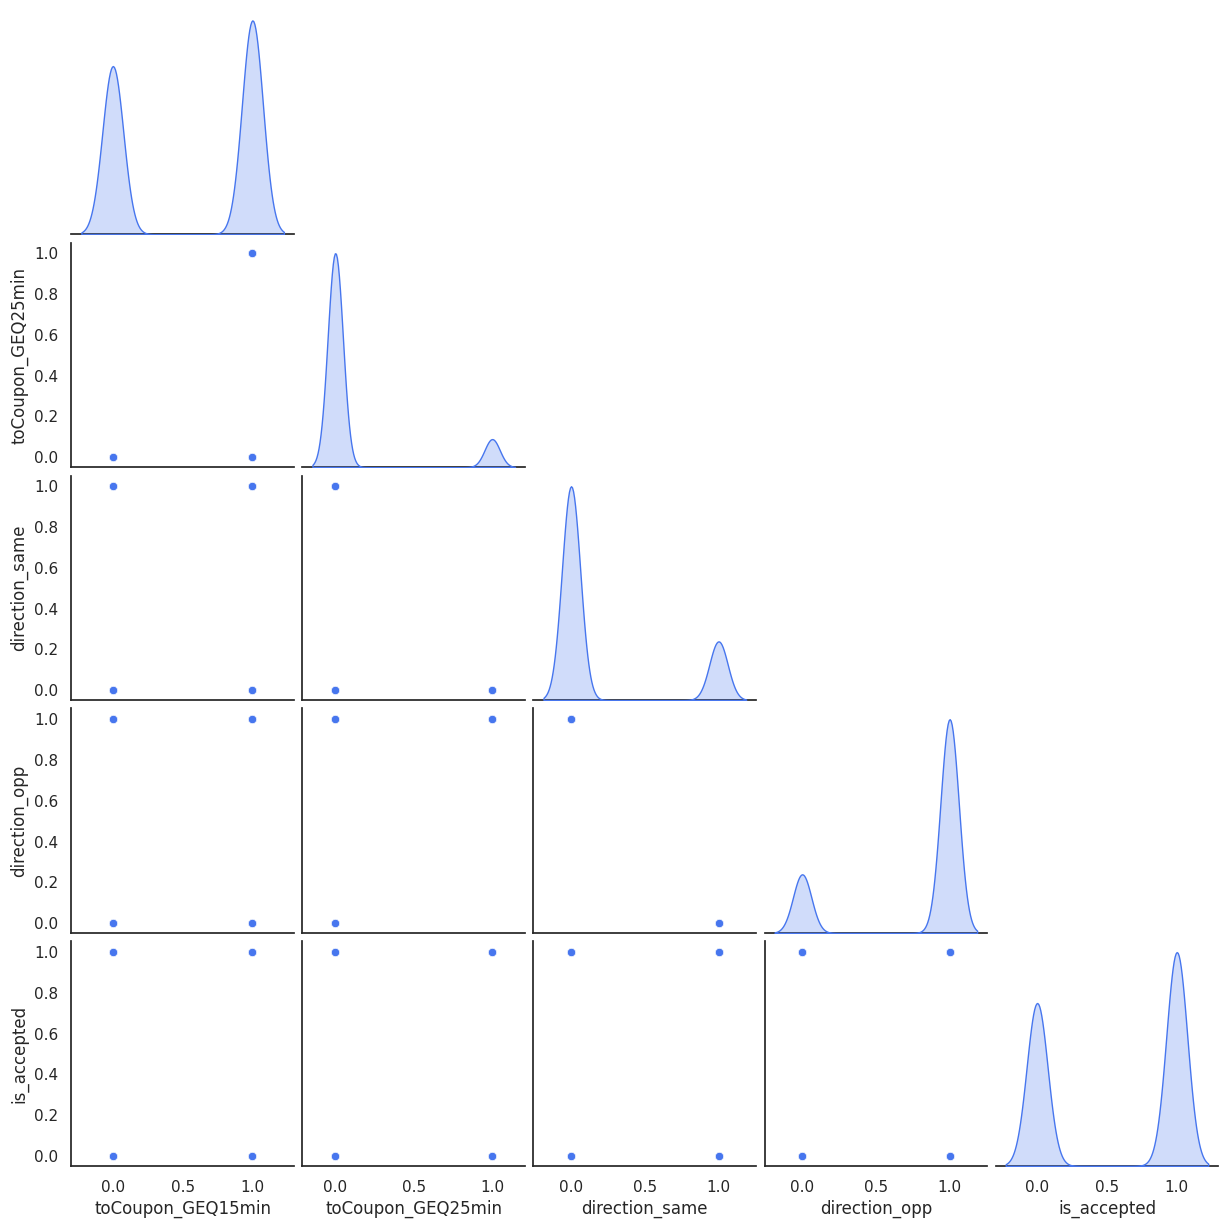

In [38]:
rcParams['figure.figsize'] = 8, 8

# Pengecekan distribusi setiap fitur dengan pairplot
sns.pairplot(df, diag_kind = 'kde', corner = True)
plt.show()

##### Correlations for the different numerical features

In [39]:
corrs = df.corr()
corrs.reset_index().rename(columns = {'index': 'Feature Name'})

,Feature Name,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,is_accepted
0,toCoupon_GEQ15min,1.000000,0.321260,-0.302066,0.302066,-0.082693
1,toCoupon_GEQ25min,0.321260,1.000000,-0.189900,0.189900,-0.108139
2,direction_same,-0.302066,-0.189900,1.000000,-1.000000,0.014932
3,direction_opp,0.302066,0.189900,-1.000000,1.000000,-0.014932
4,is_accepted,-0.082693,-0.108139,0.014932,-0.014932,1.000000


##### Heatmap of the correlations

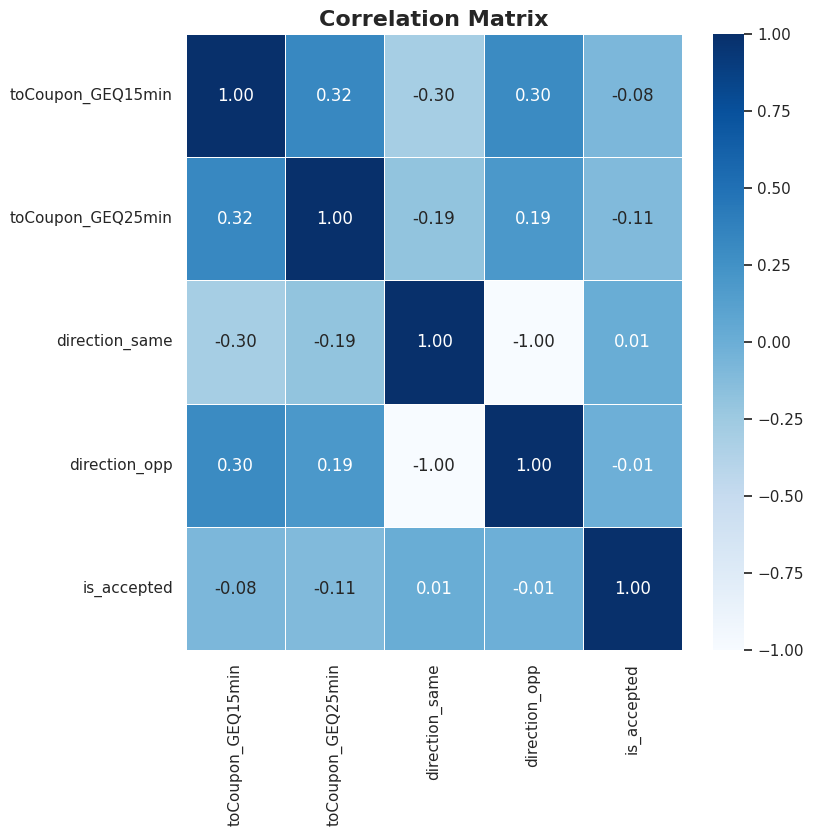

In [40]:
# Pengecekan korelasi antar fitur dengan Correlation Heatmap
sns.heatmap(data = corrs,
            cmap = 'Blues',
            annot = True,
            fmt = '.2f',
            linewidths = 0.5)
plt.title(label = 'Correlation Matrix',
          fontsize = 16,
          fontweight = 'bold')
plt.show()

- Fitur `is_accepted` berkorelasi negatif yang lemah dengan `toCoupon_GEQ15min`.
- Fitur `direction_same` berkorelasi sempurna (_perfectly collinear_) dengan `direction_opp`, sehingga akan dihapus salah satu dari kedua fitur tersebut agar tidak menimbulkan _multicollinearity_.

In [41]:
# Drop column
df.drop(columns = ['direction_opp'], inplace = True)

## **3. Business Insights**

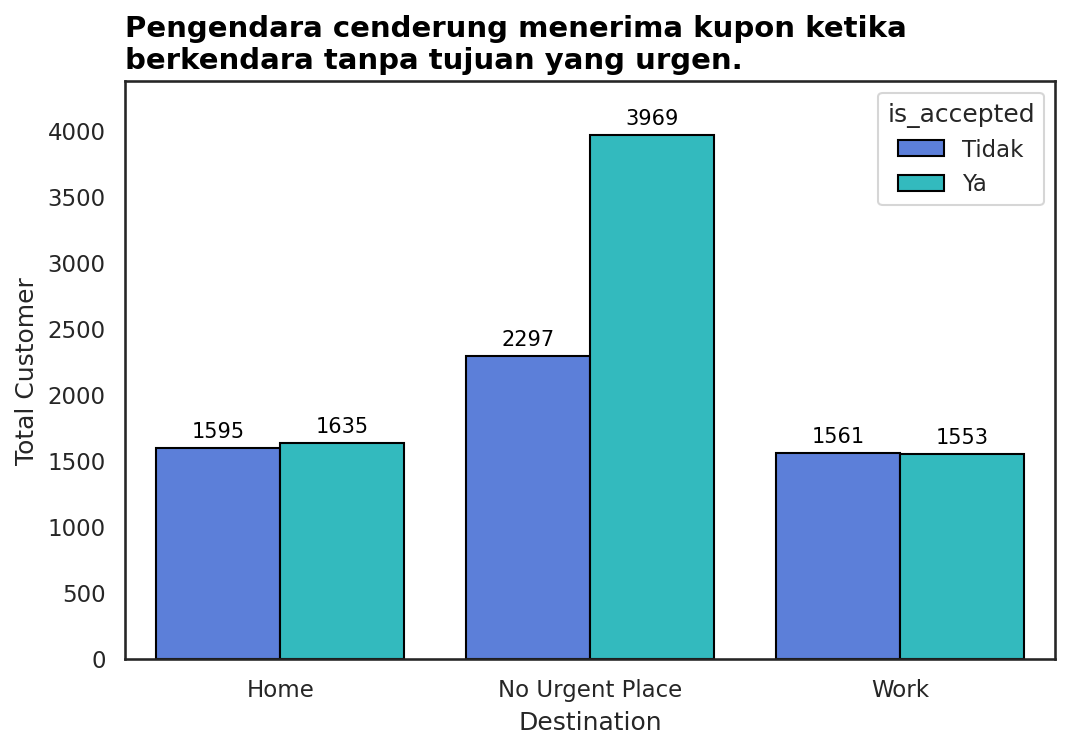

In [42]:
fig, ax = plt.subplots(figsize = (8, 5), dpi = 150)
sns.set(style = 'white', palette = 'turbo')

# Countplot with hue
sns.countplot(x = 'destination', hue = target.replace({0 : 'Tidak', 1 : 'Ya'}), 
              hue_order = ['Tidak', 'Ya'], data = df, edgecolor = 'black')

# Add total count
for p in ax.patches:
  height = p.get_height()
  ax.annotate(f'{int(height)}', xy = (p.get_x() + p.get_width() / 2, height),
              xytext = (0, 5), textcoords = 'offset points', ha = 'center',
              fontsize = 10, color = 'black')

plt.title('Pengendara cenderung menerima kupon ketika\nberkendara tanpa tujuan yang urgen.',
          fontsize = 14, color = 'black', weight = 'bold', loc = 'left')
plt.xlabel('Destination', fontsize = 12)
plt.ylabel('Total Customer', fontsize = 12)
plt.ylim(0, 4375)
plt.show()

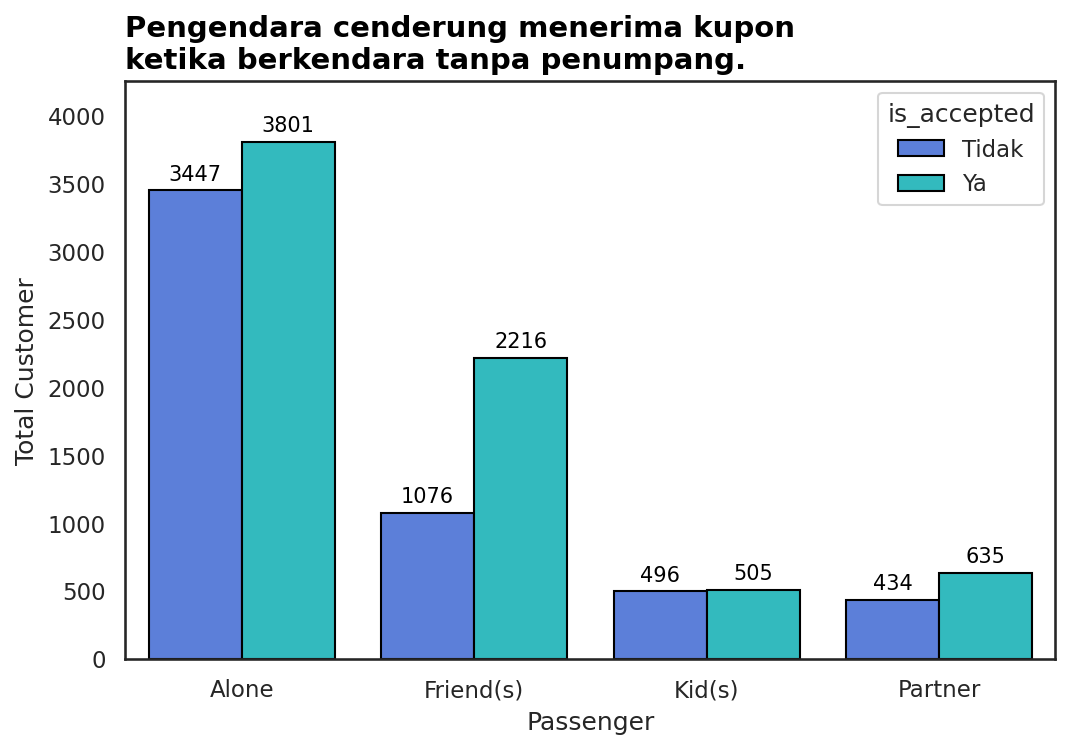

In [43]:
fig, ax = plt.subplots(figsize = (8, 5), dpi = 150)
sns.set(style = 'white', palette = 'turbo')

# Countplot with hue
sns.countplot(x = 'passenger', hue = target.replace({0 : 'Tidak', 1 : 'Ya'}), 
              hue_order = ['Tidak', 'Ya'], data = df, edgecolor = 'black')

# Add total count
for p in ax.patches:
  height = p.get_height()
  ax.annotate(f'{int(height)}', xy = (p.get_x() + p.get_width() / 2, height),
              xytext = (0, 5), textcoords = 'offset points', ha = 'center',
              fontsize = 10, color = 'black')

plt.title('Pengendara cenderung menerima kupon\nketika berkendara tanpa penumpang.',
          fontsize = 14, color = 'black', weight = 'bold', loc = 'left')
plt.xlabel('Passenger', fontsize = 12)
plt.ylabel('Total Customer', fontsize = 12)
plt.ylim(0, 4250)
plt.show()

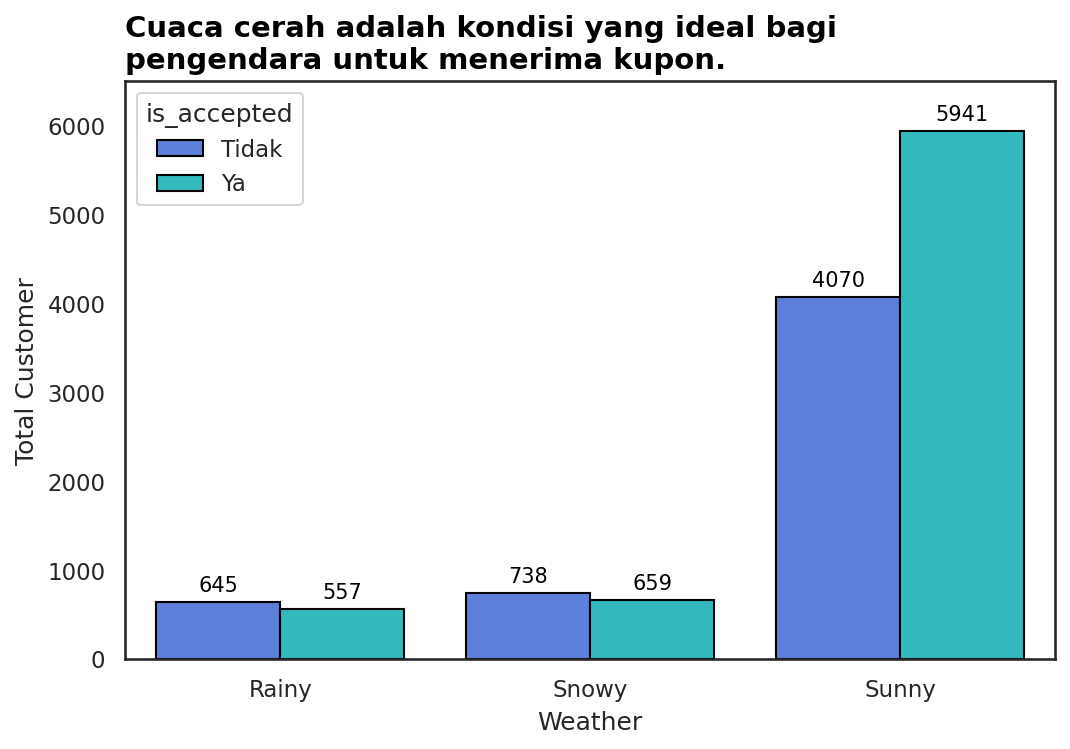

In [44]:
fig, ax = plt.subplots(figsize = (8, 5), dpi = 150)
sns.set(style = 'white', palette = 'turbo')

# Countplot with hue
sns.countplot(x = 'weather', hue = target.replace({0 : 'Tidak', 1 : 'Ya'}), 
              hue_order = ['Tidak', 'Ya'], data = df, edgecolor = 'black')

# Add total count
for p in ax.patches:
  height = p.get_height()
  ax.annotate(f'{int(height)}', xy = (p.get_x() + p.get_width() / 2, height),
              xytext = (0, 5), textcoords = 'offset points', ha = 'center',
              fontsize = 10, color = 'black')

plt.title('Cuaca cerah adalah kondisi yang ideal bagi\npengendara untuk menerima kupon.',
          fontsize = 14, color = 'black', weight = 'bold', loc = 'left')
plt.xlabel('Weather', fontsize = 12)
plt.ylabel('Total Customer', fontsize = 12)
plt.ylim(0, 6500)
plt.show()

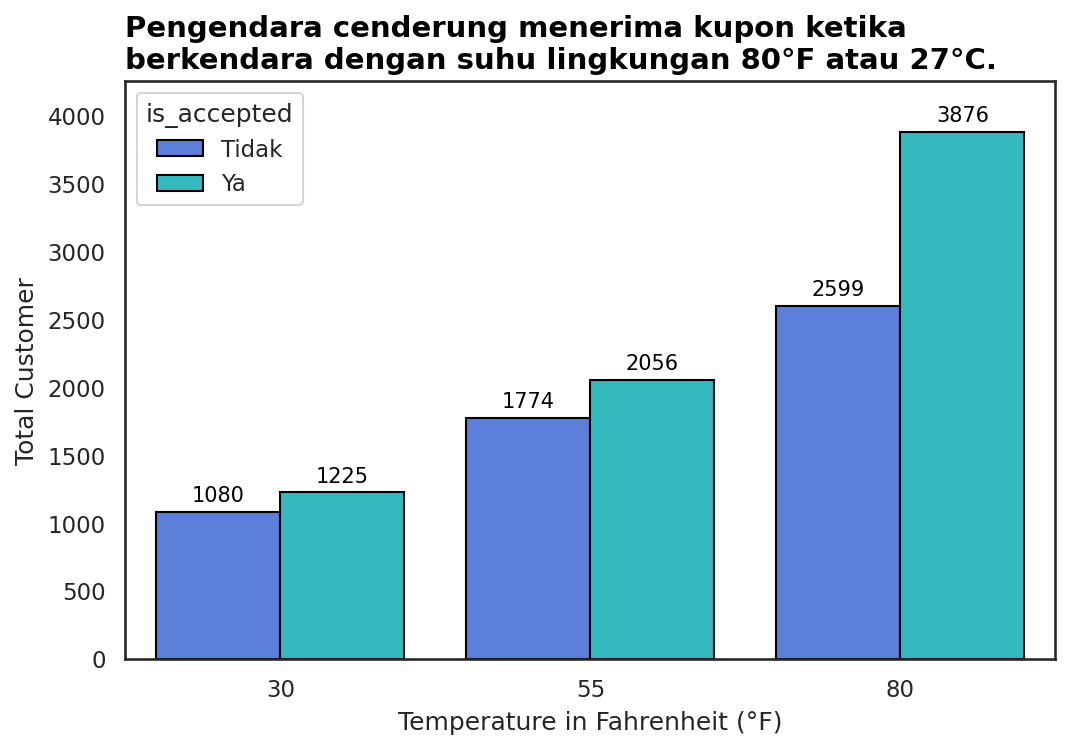

In [45]:
fig, ax = plt.subplots(figsize = (8, 5), dpi = 150)
sns.set(style = 'white', palette = 'turbo')

# Countplot with hue
sns.countplot(x = 'temperature', hue = target.replace({0 : 'Tidak', 1 : 'Ya'}), 
              hue_order = ['Tidak', 'Ya'], data = df, edgecolor = 'black')

# Add total count
for p in ax.patches:
  height = p.get_height()
  ax.annotate(f'{int(height)}', xy = (p.get_x() + p.get_width() / 2, height),
              xytext = (0, 5), textcoords = 'offset points', ha = 'center',
              fontsize = 10, color = 'black')

plt.title('Pengendara cenderung menerima kupon ketika\nberkendara dengan suhu lingkungan 80°F atau 27°C.',
          fontsize = 14, color = 'black', weight = 'bold', loc = 'left')
plt.xlabel('Temperature in Fahrenheit (°F)', fontsize = 12)
plt.ylabel('Total Customer', fontsize = 12)
plt.ylim(0, 4250)
plt.show()

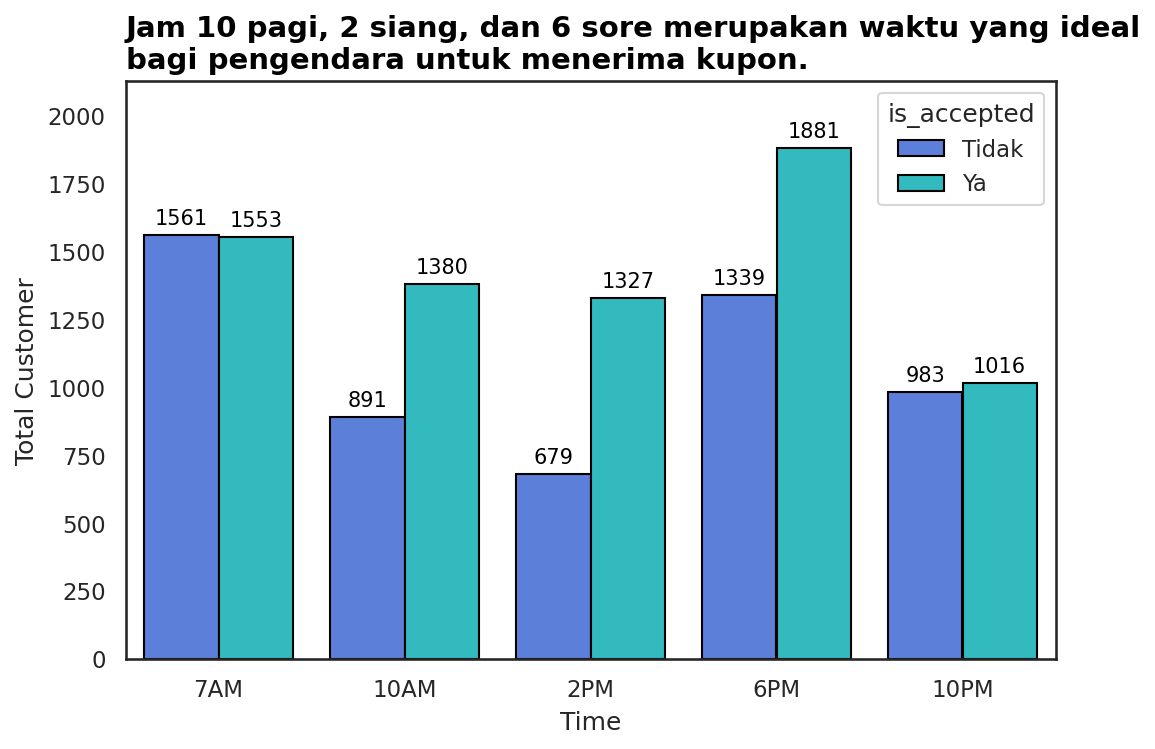

In [46]:
fig, ax = plt.subplots(figsize = (8, 5), dpi = 150)
sns.set(style = 'white', palette = 'turbo')

# Define order of x-axis labels
order = ['7AM', '10AM', '2PM', '6PM', '10PM']

# Countplot with hue
sns.countplot(x = 'time', hue = target.replace({0 : 'Tidak', 1 : 'Ya'}), 
              hue_order = ['Tidak', 'Ya'], data = df,
              order = order, edgecolor = 'black')

# Add total count
for p in ax.patches:
  height = p.get_height()
  ax.annotate(f'{int(height)}', xy = (p.get_x() + p.get_width() / 2, height),
              xytext = (0, 5), textcoords = 'offset points', ha = 'center',
              fontsize = 10, color = 'black')

plt.title('Jam 10 pagi, 2 siang, dan 6 sore merupakan waktu yang ideal\nbagi pengendara untuk menerima kupon.',
          fontsize = 14, color = 'black', weight = 'bold', loc = 'left')
plt.xlabel('Time', fontsize = 12)
plt.ylabel('Total Customer', fontsize = 12)
plt.ylim(0, 2125)
plt.show()

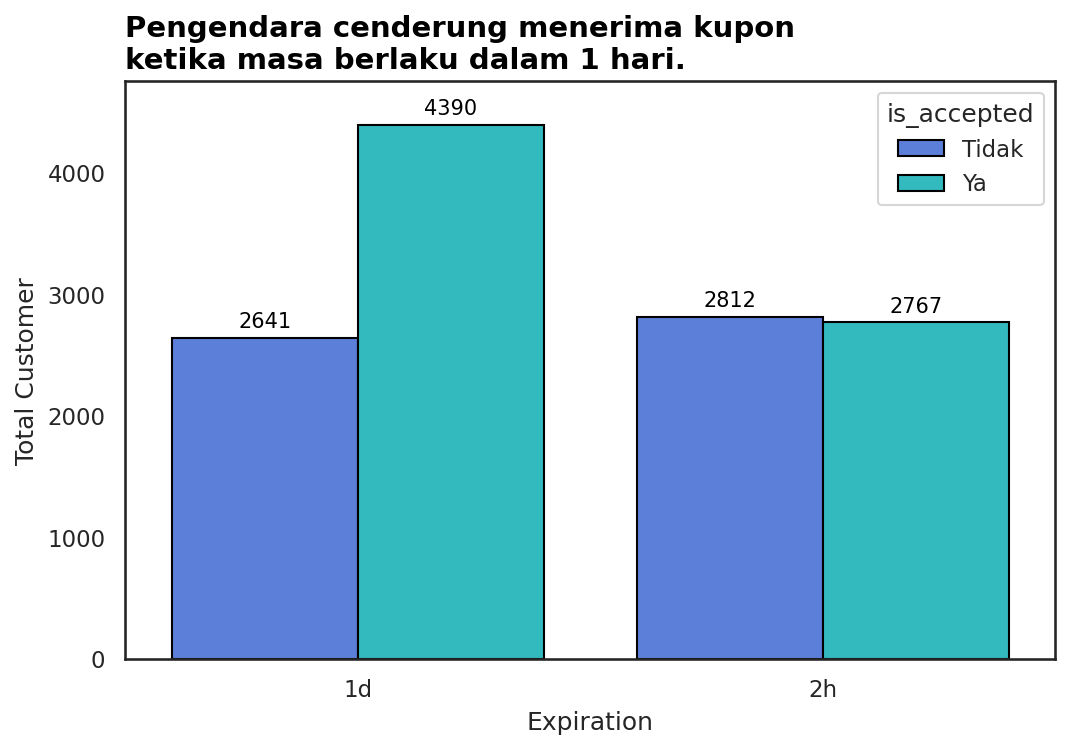

In [47]:
fig, ax = plt.subplots(figsize = (8, 5), dpi = 150)
sns.set(style = 'white', palette = 'turbo')

# Countplot with hue
sns.countplot(x = 'expiration', hue = target.replace({0 : 'Tidak', 1 : 'Ya'}), 
              hue_order = ['Tidak', 'Ya'], data = df, edgecolor = 'black')

# Add total count
for p in ax.patches:
  height = p.get_height()
  ax.annotate(f'{int(height)}', xy = (p.get_x() + p.get_width() / 2, height),
              xytext = (0, 5), textcoords = 'offset points', ha = 'center',
              fontsize = 10, color = 'black')

plt.title('Pengendara cenderung menerima kupon\nketika masa berlaku dalam 1 hari.',
          fontsize = 14, color = 'black', weight = 'bold', loc = 'left')
plt.xlabel('Expiration', fontsize = 12)
plt.ylabel('Total Customer', fontsize = 12)
plt.ylim(0, 4750)
plt.show()

# Referensi

Wang, T., Rudin, C., Doshi-Velez, F., Liu, Y., Klampfl, E., & MacNeille, P. (2017). A Bayesian Framework for Learning Rule Sets for Interpretable Classification. Journal of Machine Learning Research, 18(70):1−37. https://jmlr.org/papers/volume18/16-003/16-003.pdf